<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Hossein Anjidani

**Student ID**: 400100746




## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

# Inito

In [1]:
## Import necessary libraries here ##
import pandas as pd
from google.colab import drive
import os
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso

In [2]:
# Load datasets from drive
drive.mount('/content/drive')
path = os.path.join('/content/drive/MyDrive/UNI/Sem 6/ML/IML_CHW2/', 'Q1')

Mounted at /content/drive


# Load and using data
**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [3]:
df = pd.read_csv(os.path.join(path, 'Boston.csv'))
print(df.columns)
print(df.shape)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
(506, 14)


**Shape**:(506, 14)
  There is a bunch of data from Boston Housing; The dataset is including 13 features and `MDEV` (output) from 506 different house in different zone.
  * CRIM: Per capita crime rate by town
  * ZN: Proportion of residential land zoned for lots over 25,000 sq.ft.
  * INDUS: Proportion of non-retail business acres per town
  * CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
  * NOX: Nitric oxide concentration (parts per 10 million)
  * RM: Average number of rooms per dwelling
  * AGE: Proportion of owner-occupied units built prior to 1940
  * DIS: Weighted distances to five Boston employment centers
  * RAD: Index of accessibility to radial highways
  * TAX: Full-value property-tax rate per $10,000
  * PTRATIO: Pupil-teacher ratio by town
  * B: 1000(Bk - 0.63)^2 where Bk is the proportion of Black people by town
  * LSTAT: Percentage of lower status of the population
    

In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop('MEDV', axis=1)  # Features
y = df['MEDV']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 404
Testing set size: 102


# Training
**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [5]:
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_train_pred = model.predict(X_train)
train_r2 = r2_score(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

# Evaluate the model on the test set
y_test_pred = model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

# Print the results
print(f"Train R2: {train_r2:.2f}")
print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test R2: {test_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")

# Print the model coefficients
print("Model Coefficients:")
for i, coef in enumerate(model.coef_):
    print(f"{df.columns[i]}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

Train R2: 0.75
Train RMSE: 4.65
Test R2: 0.67
Test RMSE: 4.93
Model Coefficients:
CRIM: -0.11
ZN: 0.03
INDUS: 0.04
CHAS: 2.78
NX: -17.20
RM: 4.44
AGE: -0.01
DIS: -1.45
RAD: 0.26
TAX: -0.01
PTRATIO: -0.92
B: 0.01
LSTAT: -0.51
Intercept: 30.25


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

**Note** that for both part 3 and 4; I had used this method as the treshold: $$coef < \frac{max(coef)}{100}$$

In [6]:
# Set the alphas parameter
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Train the ridge regression model using cross-validation
models = []
MSE = []
ignored = []
for alpha in alphas:
  ridge_model = Ridge(alpha)
  ridge_model.fit(X_train, y_train)

  # Evaluate the model on the train and test sets
  y_train_pred = ridge_model.predict(X_train)
  y_test_pred = ridge_model.predict(X_test)

  train_r2 = r2_score(y_train, y_train_pred)
  train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

  test_r2 = r2_score(y_test, y_test_pred)
  test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
  MSE.append(test_rmse)
  print(f"Train R2: {train_r2:.2f}")
  print(f"Train RMSE: {train_rmse:.2f}")
  print(f"Test R2: {test_r2:.2f}")
  print(f"Test RMSE: {test_rmse:.2f}")
  total_params = X_train.shape[1]
  ignored_params = np.sum(np.abs(ridge_model.coef_) <= np.max(ridge_model.coef_) / 100)
  ignored.append(ignored_params)
  print(f"Total parameters: {total_params}")
  print(f"Number of ignored parameters: {ignored_params}")
  # Print the model coefficients
  print("Model Coefficients:", alpha)
  for i, coef in enumerate(ridge_model.coef_):
      print(f"{df.columns[i]}: {coef:.2f}")
  print(f"Intercept: {ridge_model.intercept_:.2f}")
  models.append(ridge_model)

Train R2: 0.69
Train RMSE: 5.22
Test R2: 0.67
Test RMSE: 4.89
Total parameters: 13
Number of ignored parameters: 0
Model Coefficients: 500.0
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.16
NX: -0.03
RM: 0.92
AGE: 0.02
DIS: -0.76
RAD: 0.31
TAX: -0.01
PTRATIO: -0.75
B: 0.01
LSTAT: -0.78
Intercept: 41.62
Train R2: 0.69
Train RMSE: 5.19
Test R2: 0.68
Test RMSE: 4.88
Total parameters: 13
Number of ignored parameters: 0
Model Coefficients: 434.8745013088917
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.18
NX: -0.03
RM: 1.01
AGE: 0.02
DIS: -0.80
RAD: 0.31
TAX: -0.01
PTRATIO: -0.77
B: 0.01
LSTAT: -0.78
Intercept: 41.56
Train R2: 0.69
Train RMSE: 5.16
Test R2: 0.68
Test RMSE: 4.86
Total parameters: 13
Number of ignored parameters: 1
Model Coefficients: 378.2316637773145
CRIM: -0.11
ZN: 0.04
INDUS: -0.05
CHAS: 0.20
NX: -0.04
RM: 1.12
AGE: 0.02
DIS: -0.84
RAD: 0.31
TAX: -0.02
PTRATIO: -0.78
B: 0.01
LSTAT: -0.77
Intercept: 41.38
Train R2: 0.70
Train RMSE: 5.13
Test R2: 0.68
Test RMSE: 4.86
Total paramete

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

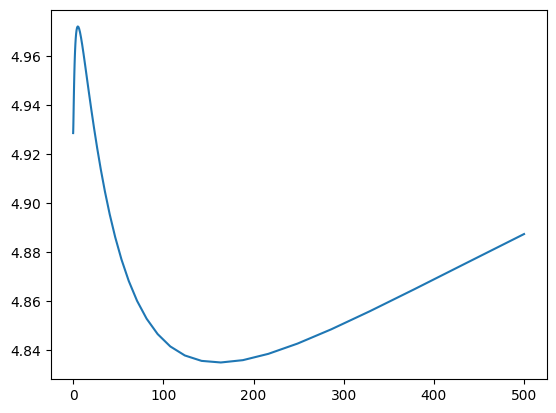

In [7]:
## Write your code here ##
plt.plot(alphas, MSE)

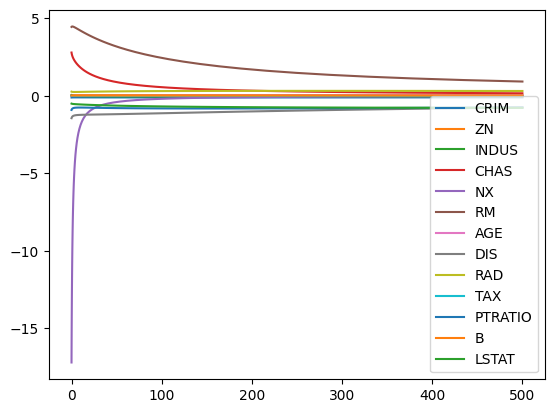

In [8]:
ax = plt.plot(alphas, [model.coef_ for model in models], label=df.columns[:-1])
plt.legend()

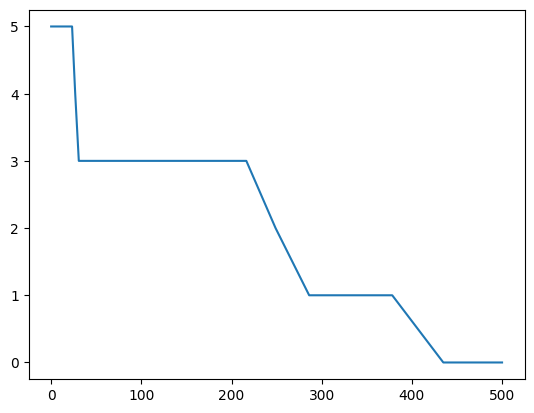

In [9]:
plt.plot(alphas, ignored)

**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?

**answer**
When it comes to choosing between ridge and Lasso regression, it depends on the specific use case. Lasso regression can be more suitable when we want to perform feature selection and have a large number of features, while ridge regression can be more suitable when we want to shrink the coefficients towards zero without setting any coefficients to exactly zero.
It is also possible to use a combination of both ridge and Lasso regression, known as Elastic Net regression, which can offer the best of both worlds by allowing for a balance between L1 and L2 regularization.

In [10]:
# Set the alphas parameter
alphas = 10 ** np.linspace(3, -3, 100) * 0.5

# Train the ridge regression model using cross-validation
models = []
MSE = []
ignored = []
for alpha in alphas:
  lasso = Lasso(alpha)
  lasso.fit(X_train, y_train)

  # Evaluate the model on the train and test sets
  y_train_pred = lasso.predict(X_train)
  y_test_pred = lasso.predict(X_test)

  train_r2 = r2_score(y_train, y_train_pred)
  train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)

  test_r2 = r2_score(y_test, y_test_pred)
  test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
  MSE.append(test_rmse)
  print(f"Train R2: {train_r2:.2f}")
  print(f"Train RMSE: {train_rmse:.2f}")
  print(f"Test R2: {test_r2:.2f}")
  print(f"Test RMSE: {test_rmse:.2f}")
  total_params = X_train.shape[1]
  ignored_params = np.sum(np.abs(lasso.coef_) <= np.max(lasso.coef_) / 100)
  ignored.append(ignored_params)
  print(f"Total parameters: {total_params}")
  print(f"Number of ignored parameters: {ignored_params}")
  # Print the model coefficients
  print("Model Coefficients:", alpha)
  for i, coef in enumerate(lasso.coef_):
      print(f"{df.columns[i]}: {coef:.2f}")
  print(f"Intercept: {lasso.intercept_:.2f}")
  models.append(lasso)

Train R2: 0.11
Train RMSE: 8.81
Test R2: 0.12
Test RMSE: 8.05
Total parameters: 13
Number of ignored parameters: 12
Model Coefficients: 500.0
CRIM: -0.00
ZN: 0.00
INDUS: -0.00
CHAS: 0.00
NX: -0.00
RM: 0.00
AGE: -0.00
DIS: 0.00
RAD: -0.00
TAX: -0.01
PTRATIO: -0.00
B: 0.00
LSTAT: -0.00
Intercept: 25.90
Train R2: 0.13
Train RMSE: 8.68
Test R2: 0.15
Test RMSE: 7.91
Total parameters: 13
Number of ignored parameters: 12
Model Coefficients: 434.8745013088917
CRIM: -0.00
ZN: 0.00
INDUS: -0.00
CHAS: 0.00
NX: -0.00
RM: 0.00
AGE: -0.00
DIS: 0.00
RAD: -0.00
TAX: -0.01
PTRATIO: -0.00
B: 0.00
LSTAT: -0.00
Intercept: 26.85
Train R2: 0.15
Train RMSE: 8.58
Test R2: 0.17
Test RMSE: 7.79
Total parameters: 13
Number of ignored parameters: 12
Model Coefficients: 378.2316637773145
CRIM: -0.00
ZN: 0.00
INDUS: -0.00
CHAS: 0.00
NX: -0.00
RM: 0.00
AGE: -0.00
DIS: 0.00
RAD: -0.00
TAX: -0.01
PTRATIO: -0.00
B: 0.00
LSTAT: -0.00
Intercept: 27.68
Train R2: 0.17
Train RMSE: 8.51
Test R2: 0.19
Test RMSE: 7.71
Total pa

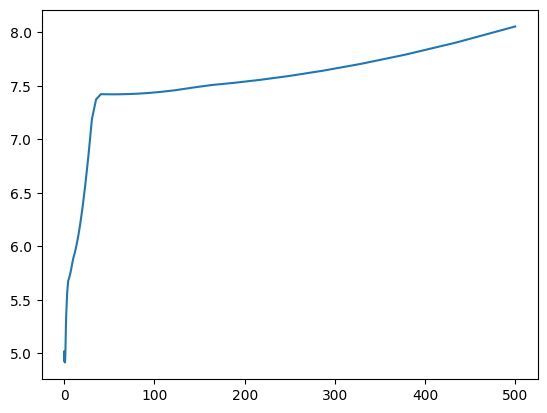

In [11]:
plt.plot(alphas, MSE)

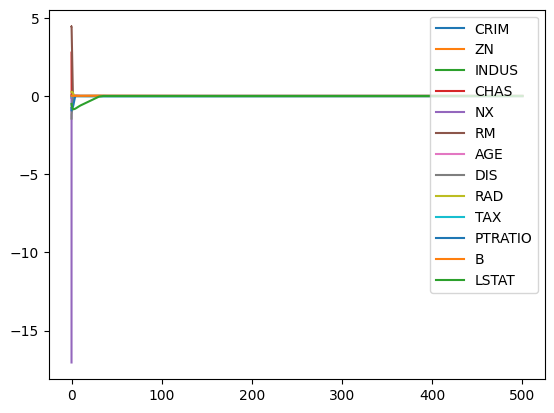

In [12]:
ax = plt.plot(alphas, [model.coef_ for model in models], label=df.columns[:-1])
plt.legend()

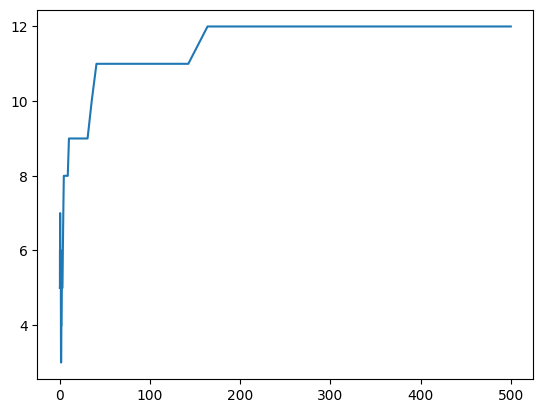

In [13]:
plt.plot(alphas, ignored)

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

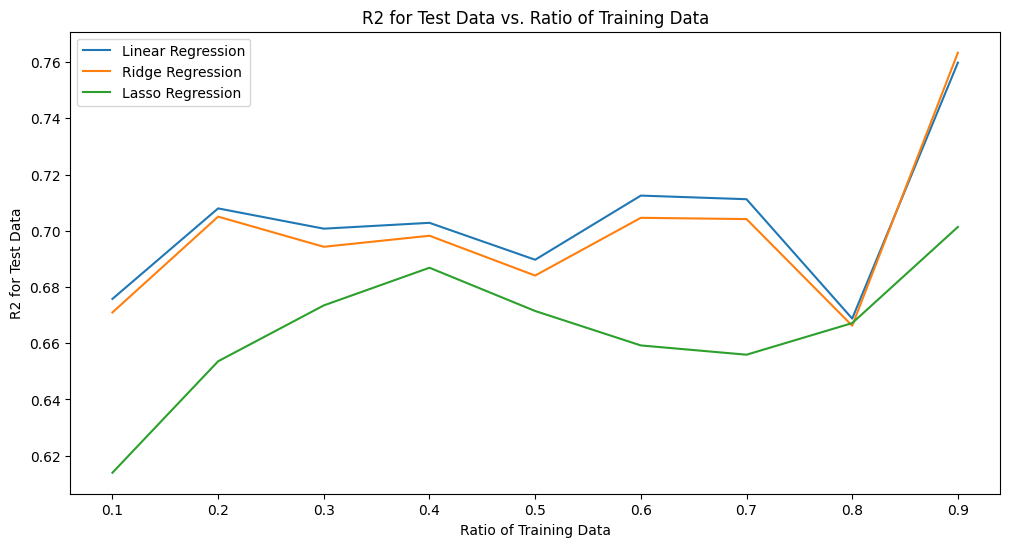

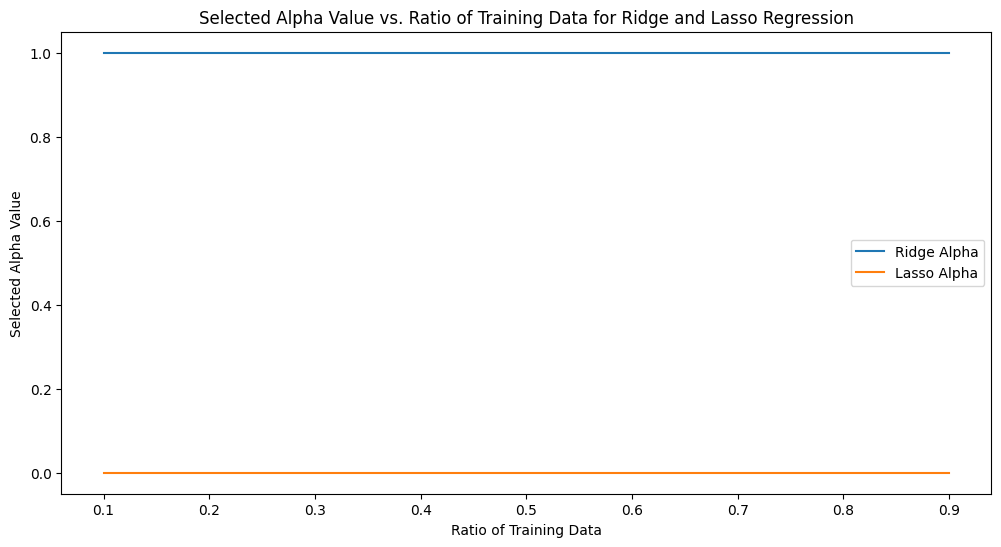

In [14]:
# Vary the ratio of training data
ratios = np.linspace(0.1, 0.9, 9)

linear_r2 = []
ridge_r2 = []
lasso_r2 = []
ridge_alphas = []
lasso_alphas = []

for ratio in ratios:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)

    # Linear Regression
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    linear_r2.append(r2_score(y_test, linear_model.predict(X_test)))

    # Ridge Regression
    ridge_model = Ridge()
    ridge_model.fit(X_train, y_train)
    ridge_r2.append(r2_score(y_test, ridge_model.predict(X_test)))
    ridge_alphas.append(ridge_model.get_params()['alpha'])

    # Lasso Regression
    lasso_model = Lasso()
    lasso_model.fit(X_train, y_train)
    lasso_r2.append(r2_score(y_test, lasso_model.predict(X_test)))
    lasso_alphas.append(lasso.get_params()['alpha'])

# Plot R2 for test data versus ratio of training data
plt.figure(figsize=(12, 6))
plt.plot(ratios, linear_r2, label='Linear Regression')
plt.plot(ratios, ridge_r2, label='Ridge Regression')
plt.plot(ratios, lasso_r2, label='Lasso Regression')
plt.xlabel('Ratio of Training Data')
plt.ylabel('R2 for Test Data')
plt.title('R2 for Test Data vs. Ratio of Training Data')
plt.legend()
plt.show()

# Plot Selected Alpha values for Ridge and Lasso Regression
plt.figure(figsize=(12, 6))
plt.plot(ratios, ridge_alphas, label='Ridge Alpha')
plt.plot(ratios, lasso_alphas, label='Lasso Alpha')
plt.xlabel('Ratio of Training Data')
plt.ylabel('Selected Alpha Value')
plt.title('Selected Alpha Value vs. Ratio of Training Data for Ridge and Lasso Regression')
plt.legend()
plt.show()